In [21]:
from PIL import Image
import scipy.ndimage
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KDTree
import matplotlib.pyplot as plt
import scipy.sparse.linalg as splinalg
import glob
import scipy.io
%matplotlib inline

## 2. Visualize the image and the ground truth segmentation

In [22]:
#read a single ground truth file for a specific image
mat = scipy.io.loadmat('E:/TERM/TERM8/Pattern Recognition/Assignments/Assignment2/BSR/BSDS500/data/groundTruth/train/239096.mat')

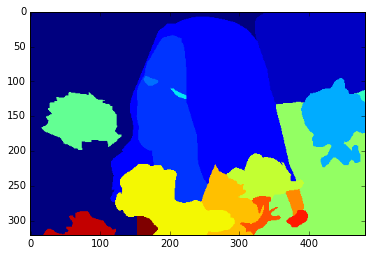

In [23]:
ground_truth = mat['groundTruth'][0][4][0][0][0]
plt.imshow(ground_truth)
#plt.imshow(mat['groundTruth'][0][4][0][0][0])

In [24]:
#print(mat['groundTruth'][0][1][0][0][0])

## Reading the training set

In [27]:
data_set = []
for filename in glob.glob('E:/TERM/TERM8/Pattern Recognition/Assignments/Assignment2/BSR/BSDS500/data/images/train/*.jpg'):
    image=Image.open(filename)
    image_pixels_vector = np.asarray(image).reshape(-1)
    data_set.append(image_pixels_vector)
    

data_set = np.array(data_set)
data_set = data_set.reshape((154401 * len(data_set), 3))
data_set = np.unique(data_set, axis=0)
#pix = im.load()
#print(pix[480, 320])
#plt.imshow(im)
#plt.show()
#print(im)
#print(len(im))
#print(len(data_set))
#print(data_set)

In [28]:
#print(len(data_set))
#print(data_set)
#print(data_set[1])
#print(data_set[2])

## Segmentation using K-means

In [29]:
def k_means(k, data_set):
    
    centroids_difference = 10000 
    
    new_centroids = []
    for i in range(k):
        #new_centroids.append(np.random.randint(150, size=3))
        new_centroids.append(data_set[i])
        #print(new_centroids)
        
    while(centroids_difference > 0.001):
        clusters = [[] for i in range(k)]
        
        for i in range(len(data_set)):
            distances_from_centroids = []
            for j in range(k):
                distances_from_centroids.append(np.linalg.norm(new_centroids[j] - data_set[i]))
                #print(np.linalg.norm(new_centroids[j] - data_set[i]))
        
            cluster_index = distances_from_centroids.index(min(distances_from_centroids))
            clusters[cluster_index].append(data_set[i])
            
            
        old_centroids = new_centroids[:]
        for i in range(k):
            new_centroids[i] = np.mean(clusters[i] , axis=0)
          
        
        centroids_difference = 0
        for i in range(k):
            if(len(new_centroids[i]) == 0):
                new_centroids[i] = [0] * len(data_set[0])
            centroids_difference += np.abs(np.linalg.norm(old_centroids[i]) - np.linalg.norm(new_centroids[i]))
        
        #print(centroids_difference)
        
       
    return clusters, new_centroids

In [7]:
#clusters_number = [3,5,7,9,11]
#for k in clusters_number:
#K-means for each K Cluster
clusters, cluster_color = k_means(3, data_set)
clusters, cluster_color = k_means(5, data_set)
clusters, cluster_color = k_means(7, data_set)
clusters, cluster_color = k_means(11, data_set)

[array([0, 0, 0], dtype=uint8)]
[array([0, 0, 0], dtype=uint8), array([0, 0, 2], dtype=uint8)]
[array([0, 0, 0], dtype=uint8), array([0, 0, 2], dtype=uint8), array([0, 0, 4], dtype=uint8)]
513.524735444308
lol
89.79257275142947
lol
51.84729087032959
lol
28.710124029752578
lol
17.103115531680558
lol
10.769767386424832
lol
7.186366334901109
lol
5.1757305757347325
lol
3.9892764371400347
lol
3.2081858331942215
lol
2.6535147630349343
lol
2.218243203388994
lol
1.8382033058798726
lol
1.5187466151377151
lol
1.258954639448291
lol
1.039371400443443
lol
0.8568988176795784
lol
0.7048670856656543
lol
0.5971950473628453
lol
0.4738911965655461
lol
0.3931548525901718
lol
0.3158588211317408
lol
0.2650911232055506
lol
0.20842051428404318
lol
0.16571832599538538
lol
0.1365921359151514
lol
0.11048789495372091
lol
0.0994950784997144
lol
0.08333729797135447
lol
0.06581250689914953
lol
0.05215017461318894
lol
0.038781672673550815
lol
0.032938779891040326
lol
0.030266318799164083
lol
0.024364874404000147
lol


In [30]:
pixil_color_map = {}
for i in range(len(clusters)):
    for point in clusters[i]:
        pixil_color_map.update({str(point) : cluster_color[i]})       
#print(len(pixil_color_map))

In [48]:
val_set = []
filename =  glob.glob('E:/TERM/TERM8/Pattern Recognition/Assignments/Assignment2/BSR/BSDS500/data/images/train/239096.jpg')
image=Image.open(filename[0])
    #pix = im.load()
    #print(pix[480, 320])
    #plt.imshow(im)
    #plt.show()
    
image_pixels_vector = np.asarray(image).reshape(-1)
val_set.append(image_pixels_vector)
    
    #print(im)
    #print(len(im))

val_set = np.array(val_set)
#print(len(data_set))
val_set = val_set.reshape((154401, 3))

In [49]:
image_pixels = []
for i in range(len(val_set)):
    #RGB = pixil_color_map.get(str(val_set[i]))
    RGB = pixil_color_map.setdefault(str(val_set[i]), [0, 0, 0])
    image_pixels.append(RGB[0] * 256**2 + RGB[1]*256 + RGB[2])

1283909


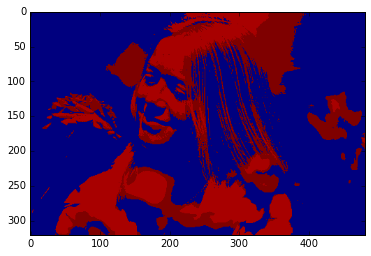

In [50]:
print(len(pixil_color_map))
cluster_color_image = (np.array(image_pixels)).reshape((321, 481))
plt.imshow(cluster_color_image)

## Creating the partitioning & clustering

In [124]:
def convert_clusters_type(clusters):
    
    for i in range(len(clusters)):
        for j in range(len(clusters[i])):
            clusters[i][j] = (clusters[i][j]).tolist()
        

In [197]:
def get_clustering(val_set, centroids):
    
    clustering = [[] for i in range(len(centroids))]
    
    for i in range(len(val_set)):
        distances_from_centroids = []
        for j in range(len(centroids)):
            distances_from_centroids.append(np.linalg.norm(centroids[j] - data_set[i]))
            #print(np.linalg.norm(new_centroids[j] - data_set[i]))
        
            cluster_index = distances_from_centroids.index(min(distances_from_centroids))
            clustering[cluster_index].append(i)
    
        
        #print('cluster1 length = %d' % len(clustering[0]))
        #print('cluster2 length = %d' % len(clustering[1]))
        #print('cluster3 length = %d' % len(clustering[2]))
                
    return clustering

In [198]:
def get_partitioning(ground_truth):
    ground_truth = ground_truth.reshape(-1)
    unique_values = list(set(ground_truth))
    
    partitioning_num = len(unique_values)
    partitioning = [[] for i in range(partitioning_num)]
    
    uniqueValue_partitioningIndex_map = {}
   
    for i in range(partitioning_num):
        uniqueValue_partitioningIndex_map.update({str(unique_values[i]) : i})
        
        
    for i in range(len(ground_truth)):
        partition_index = uniqueValue_partitioningIndex_map.get(str(ground_truth[i]))
        partitioning[partition_index].append(i)
        
    return partitioning

In [199]:
partitioning = get_partitioning(mat['groundTruth'][0][1][0][0][0])

In [200]:
clustering = get_clustering(val_set, cluster_color)

In [222]:
print(len(partitioning[2]))

11062


In [221]:
print(len(clustering[2]))

82178


## Contingency Table

In [217]:
def create_contingency_table(partitioning, clustering):
    contingency_table = np.zeros((len(clustering), len(partitioning)))
    
    for i in range(len(clustering)):
        for j in range(len(clustering[i])):
            for k in range(len(partitioning)):
                if(clustering[i][j] in partitioning[k]):
                    contingency_table[i][k] += 1
                    break
    #print(contingency_table)
    return contingency_table

contingency_table = create_contingency_table(partitioning, clustering)

## Conditional Entropy Measure

In [216]:
def conditional_entropy_measure(partitioning, clustering, data_set_length, contingency_table):
    
    conditional_entropy = 0
    
    for i in range(len(contingency_table[:,0])):
        for j in range(len(contingency_table[0])):
            if(contingency_table[i][j] != 0):
                conditional_entropy += (contingency_table[i][j] / data_set_length) * np.log(contingency_table[i][j] / len(clustering[i]))
            #print(len(clustering[i]))
            #print(np.log10(contingency_table[i][j] / len(clustering[i])))
            
    conditional_entropy *= -1
    
    return conditional_entropy


conditional_entropy_measure(partitioning, clustering, len(val_set), contingency_table)

## F Measure

In [226]:
def TP(contingency_table, data_set_length):
    
    TP = 0
    
    for i in range(len(contingency_table[:,0])):
        for j in range(len(contingency_table[0])):
            TP += np.square(contingency_table[i][j])
            
    TP -= data_set_length
    
    TP /= 2.0
    
    return TP


def FN(contingency_table, partitioning):
    
    FN = 0
    
    for i in range(len(partitioning)):
        FN += np.square(len(partitioning[i]))
    
    for i in range(len(contingency_table[:,0])):
        temp = 0
        for j in range(len(contingency_table[0])):
            temp += np.square(contingency_table[i][j])
        
        FN -= temp
        
    FN /= 2.0
    
    return FN



def FP(conditional_entropy, clustering):
    
    FP = 0
    
    for i in range(len(clustering)):
        FP += np.square(len(clustering[i]))
    
    for i in range(len(contingency_table[:,0])):
        temp = 0
        for j in range(len(contingency_table[0])):
            temp += np.square(contingency_table[i][j])
        
        FP -= temp
        
    FP /= 2.0
    
    return FP


def F_measure(partitioning, clustering, contingency_table):
    
    F = 0
    
    for i in range (len(clustering)):
        
        max_element = max(contingency_table[i])
        
        max_index = np.where(contingency_table[i] == max_element)
        
        prec =  max_element / len(clustering[i])
        
        recall = max_element / len(partitioning[max_index[0][0]])
        
        F += (2 * prec * recall) / (prec + recall)
        
    F /= len(clustering)
    
    return F


F_measure(partitioning, clustering, contingency_table)


In [313]:
data_set = []
for filename in glob.glob('E:/TERM/TERM8/Pattern Recognition/Assignments/Assignment2/BSR/BSDS500/data/images/normalized cut/*.jpg'):
    image=Image.open(filename)
    #pix = im.load()
    #print(pix[480, 320])
    #plt.imshow(im)
    #plt.show()
    
    image_pixels_vector = np.asarray(image).reshape(-1)
    data_set.append(image_pixels_vector)
    
    #print(im)
    #print(len(im))
    

data_set = np.array(data_set)
#print(len(data_set))
data_set = data_set.reshape((15000 * len(data_set), 3))
data_set = np.unique(data_set, axis=0)
print(len(data_set))

8027


## Segmentation using Normalized Cut

In [305]:
def spectral_clustring_kNN_similarity(k, data_set):
    
    KNN_similarity_matrix = KNN_similarity(5, data_set)
    
    degree_list = []
    
    for i in range(len(data_set)):
        degree_list.append(sum(KNN_similarity_matrix[i]))
        
    #print(degree_list)
    degree_matrix = np.diag(degree_list)
         
    laplacian_matrix = degree_matrix - KNN_similarity_matrix
    
    degree_matrix_inverse = np.linalg.inv(degree_matrix)
    
    normalized_asymmetric_laplacian_matrix = np.matmul(degree_matrix_inverse, laplacian_matrix)
    
    
    eigenvalues, eigenvectors = splinalg.eigsh(normalized_asymmetric_laplacian_matrix, k = k)
    
    #print(eigenvalues)
    
    U_matrix = eigenvectors[:,:k]
    print(eigenvectors)
    
    Y_matrix = [0] * k
    for i in range(len(data_set)):
        print(np.linalg.norm(U_matrix[i]))
        Y_matrix = np.vstack([Y_matrix, (U_matrix[i] / np.linalg.norm(U_matrix[i]))])
    Y_matrix = Y_matrix[1: , 0:]
        
    return Y_matrix
    #fig = plt.figure()
    #ax = fig.add_subplot(111,projection='3d')
    #ax.scatter(Y_matrix[:,0], Y_matrix[:,1], Y_matrix[:,2])
    
    
    
def KNN_similarity(knn, data_set):
    tree = KDTree(data_set, leaf_size=10)
    dist, KNNindexs = tree.query(data_set, k=knn)
    KNN_similarity_matrix = np.zeros((len(data_set), len(data_set)))
    for i in range(len(KNNindexs)):
        for j in range(knn):
            KNN_similarity_matrix[i][KNNindexs[i][j]] = 1
            
            
    return KNN_similarity_matrix


Y_matrix = spectral_clustring_kNN_similarity(5, data_set)

[[-1.87295496e-05  2.86851675e-05  2.03151585e-05  2.50430362e-06
   3.54177675e-05]
 [ 4.43837005e-06  5.50125752e-05  6.04112974e-06  3.33215539e-06
   1.38922503e-05]
 [ 2.05252975e-05  7.44036361e-06  1.83315087e-05  1.97891242e-06
   6.10201419e-05]
 ...
 [ 2.18573792e-05  9.84589395e-05 -6.31339638e-07  2.47607751e-06
   2.69520984e-04]
 [-3.22632800e-05  1.61324995e-05 -5.60231788e-05 -2.27845276e-05
   2.15425397e-04]
 [-3.83068433e-07 -7.94555772e-06  2.37698874e-05  1.32228515e-05
   1.75792054e-06]]
5.335757042821673e-05
5.732953586142996e-05
6.738000349207384e-05
6.795190100139798e-05
4.170581438155164e-05
3.067578083609866e-05
0.00027023366179926533
3.77781935535328e-05
0.00027343564031539813
0.00026290271801633836
0.000402972350172782
0.00026800403923161895
0.0003665655963718559
0.0004379088570717712
0.00037554405251892574
0.0004557924785873473
0.00018588187301334886
0.009685582528223678
0.015536870075504809
0.0009601545143422283
0.00047683699059915464
0.00381071115362653

In [286]:
print(Y_matrix)

[[-0.25843374  0.89783248  0.02314196  0.21829428  0.28092863]
 [ 0.31263006 -0.70530807  0.32657714 -0.53206503  0.12270757]
 [ 0.31360072 -0.70031606  0.32784558 -0.53358382  0.1379043 ]
 ...
 [ 0.10462163 -0.77498676 -0.14649226  0.03030977  0.60503816]
 [ 0.17650839 -0.77879215  0.18638052 -0.24842366 -0.51563123]
 [ 0.09009484  0.76735525  0.14000563 -0.0251934  -0.61871847]]


In [315]:
def spectral_clustering_k_means(k, k_means_on, k_means_for):
    
    centroids_difference = 10000 
    
    new_centroids = []
    clusters_color_centroids = []
    
    for i in range(k):
        #new_centroids.append(np.random.randint(150, size=3))
        new_centroids.append(k_means_on[i])
        clusters_color_centroids.append(np.random.randint(150, size=3))
        

        
    while(centroids_difference > 0.001):
        clusters = [[] for i in range(k)]
        clusters_color = [[] for i in range(k)]
        
        for i in range(len(data_set)):
            distances_from_centroids = []
            for j in range(k):
                distances_from_centroids.append(np.linalg.norm(new_centroids[j] - k_means_on[i]))
                #print(np.linalg.norm(new_centroids[j] - data_set[i]))
        
            cluster_index = distances_from_centroids.index(min(distances_from_centroids))
            clusters[cluster_index].append(k_means_on[i])
            clusters_color[cluster_index].append(k_means_for[i])
            
            
        old_centroids = new_centroids[:]
        for i in range(k):
            new_centroids[i] = np.mean(clusters[i] , axis=0)
            clusters_color_centroids[i] = np.mean(clusters_color[i], axis=0)
          
        
        centroids_difference = 0
        for i in range(k):
            if(len(new_centroids[i]) == 0):
                new_centroids[i] = [0] * len(k_means_on[0])
            centroids_difference += np.abs(np.linalg.norm(old_centroids[i]) - np.linalg.norm(new_centroids[i]))
        
       
    return clusters_color, clusters_color_centroids


clusters, clusters_color = spectral_clustering_k_means(5, Y_matrix, data_set)

In [316]:
pixil_color_map = {}
for i in range(len(clusters)):
    for point in clusters[i]:
        pixil_color_map.update({str(point) : clusters_color[i]})
        
print(len(pixil_color_map))

8027


In [317]:
data_set = []
for filename in glob.glob('E:/TERM/TERM8/Pattern Recognition/Assignments/Assignment2/BSR/BSDS500/data/images/normalized cut/*.jpg'):
    image=Image.open(filename)
    #pix = im.load()
    #print(pix[480, 320])
    #plt.imshow(im)
    #plt.show()
    
    image_pixels_vector = np.asarray(image).reshape(-1)
    data_set.append(image_pixels_vector)
    
    #print(im)
    #print(len(im))

data_set = np.array(data_set)
#print(len(data_set))
data_set = data_set.reshape((15000 * len(data_set), 3))


image_pixels = []
for i in range(len(data_set)):
    #RGB = pixil_color_map.get(str(val_set[i]))
    RGB = pixil_color_map.setdefault(str(data_set[i]), [0, 0, 0])
    image_pixels.append(RGB[0] * 256**2 + RGB[1]*256 + RGB[2])

8027


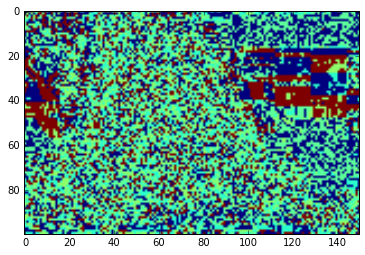

In [318]:
print(len(pixil_color_map))
cluster_color_image = (np.array(image_pixels)).reshape((100, 150))
plt.imshow(cluster_color_image)

In [310]:
clusters, cluster_colors = k_means(5, data_set)

[array([ 8, 41, 10], dtype=uint8)]
[array([ 8, 41, 10], dtype=uint8), array([20, 53, 22], dtype=uint8)]
[array([ 8, 41, 10], dtype=uint8), array([20, 53, 22], dtype=uint8), array([41, 72, 40], dtype=uint8)]
[array([ 8, 41, 10], dtype=uint8), array([20, 53, 22], dtype=uint8), array([41, 72, 40], dtype=uint8), array([50, 80, 46], dtype=uint8)]
[array([ 8, 41, 10], dtype=uint8), array([20, 53, 22], dtype=uint8), array([41, 72, 40], dtype=uint8), array([50, 80, 46], dtype=uint8), array([49, 76, 43], dtype=uint8)]
269.95607563379434
lol
74.85660002350892
lol
46.6079803098882
lol
34.28218936859662
lol
29.11619426592808
lol
25.26581353925924
lol
23.41365385092439
lol
20.650957692382164
lol
18.205534580588193
lol
17.33861785762084
lol
16.98343518032202
lol
16.58932095145213
lol
17.196370107655326
lol
15.883082912028655
lol
15.695811834354366
lol
14.765718878096841
lol
14.608366324123658
lol
13.111219791426265
lol
11.451178174262502
lol
9.479323506378826
lol
7.968878939278866
lol
5.717061703782

8027
8027


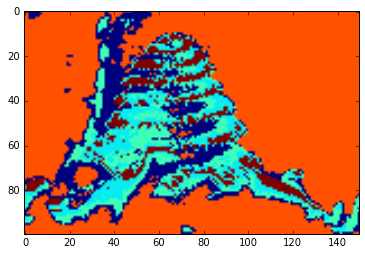

In [312]:
pixil_color_map = {}
for i in range(len(clusters)):
    for point in clusters[i]:
        pixil_color_map.update({str(point) : cluster_color[i]})
        
print(len(pixil_color_map))


image_pixels = []
for i in range(len(data_set)):
    #RGB = pixil_color_map.get(str(val_set[i]))
    RGB = pixil_color_map.setdefault(str(data_set[i]), [0, 0, 0])
    image_pixels.append(RGB[0] * 256**2 + RGB[1]*256 + RGB[2])
    

print(len(pixil_color_map))
cluster_color_image = (np.array(image_pixels)).reshape((100, 150))
plt.imshow(cluster_color_image)
    

## EXTRA

In [11]:
data_set = []
for filename in glob.glob('E:/TERM/TERM8/Pattern Recognition/Assignments/Assignment2/BSR/BSDS500/data/images/normalized cut/*.jpg'):
    image=Image.open(filename)
    #pix = im.load()
    #print(pix[480, 320])
    #plt.imshow(im)
    #plt.show()
    
    image_pixels_vector = np.asarray(image).reshape(-1)
    data_set.append(image_pixels_vector)
    
data_set = np.array(data_set)

data_size = len(data_set)

print(data_size)
#print(len(data_set))
data_set = data_set.reshape((15000 * data_size, 3))

print(data_set)


1
[[ 8 41 10]
 [20 53 22]
 [41 72 40]
 ...
 [48 54 18]
 [17 27  2]
 [ 8 20  0]]


In [12]:
pixel_spatial_layout =[]
for i in range (data_size):
    for j in range (100):
        for k in range (150):
            pixel_spatial_layout.append([j,k])
            
print(pixel_spatial_layout)

[[0, 0], [0, 1], [0, 2], [0, 3], [0, 4], [0, 5], [0, 6], [0, 7], [0, 8], [0, 9], [0, 10], [0, 11], [0, 12], [0, 13], [0, 14], [0, 15], [0, 16], [0, 17], [0, 18], [0, 19], [0, 20], [0, 21], [0, 22], [0, 23], [0, 24], [0, 25], [0, 26], [0, 27], [0, 28], [0, 29], [0, 30], [0, 31], [0, 32], [0, 33], [0, 34], [0, 35], [0, 36], [0, 37], [0, 38], [0, 39], [0, 40], [0, 41], [0, 42], [0, 43], [0, 44], [0, 45], [0, 46], [0, 47], [0, 48], [0, 49], [0, 50], [0, 51], [0, 52], [0, 53], [0, 54], [0, 55], [0, 56], [0, 57], [0, 58], [0, 59], [0, 60], [0, 61], [0, 62], [0, 63], [0, 64], [0, 65], [0, 66], [0, 67], [0, 68], [0, 69], [0, 70], [0, 71], [0, 72], [0, 73], [0, 74], [0, 75], [0, 76], [0, 77], [0, 78], [0, 79], [0, 80], [0, 81], [0, 82], [0, 83], [0, 84], [0, 85], [0, 86], [0, 87], [0, 88], [0, 89], [0, 90], [0, 91], [0, 92], [0, 93], [0, 94], [0, 95], [0, 96], [0, 97], [0, 98], [0, 99], [0, 100], [0, 101], [0, 102], [0, 103], [0, 104], [0, 105], [0, 106], [0, 107], [0, 108], [0, 109], [0, 110],

In [13]:
pixel_spatial_layout = np.array(pixel_spatial_layout)

data_set = np.hstack([data_set, pixel_spatial_layout])

print(data_set)
data_set = np.unique(data_set, axis=0)
print(len(data_set))

[[  8  41  10   0   0]
 [ 20  53  22   0   1]
 [ 41  72  40   0   2]
 ...
 [ 48  54  18  99 147]
 [ 17  27   2  99 148]
 [  8  20   0  99 149]]
15000


In [16]:
def k_means(k, data_set):
    
    centroids_difference = 10000 
    
    new_centroids = []
    for i in range(k):
        #new_centroids.append(np.random.randint(150, size=3))
        new_centroids.append(data_set[i])
    
        
        print(new_centroids)
        
    while(centroids_difference > 0.001):
        clusters = [[] for i in range(k)]
        
        for i in range(len(data_set)):
            distances_from_centroids = []
            for j in range(k):
                distances_from_centroids.append(np.linalg.norm(new_centroids[j] - data_set[i]))
                #print(np.linalg.norm(new_centroids[j] - data_set[i]))
        
            cluster_index = distances_from_centroids.index(min(distances_from_centroids))
            clusters[cluster_index].append(data_set[i])
            
            
        old_centroids = new_centroids[:]
        for i in range(k):
            new_centroids[i] = np.mean(clusters[i] , axis=0)
          
        
        centroids_difference = 0
        for i in range(k):
            if(len(new_centroids[i]) == 0):
                new_centroids[i] = [0] * len(data_set[0])
            centroids_difference += np.abs(np.linalg.norm(old_centroids[i]) - np.linalg.norm(new_centroids[i]))
        
        print(centroids_difference)
        
        print('lol')
       
    return clusters, new_centroids

clusters, cluster_color = k_means(5, data_set)

[array([  0,  19,   6,  99, 129])]
[array([  0,  19,   6,  99, 129]), array([  0,  21,   8,  99, 115])]
[array([  0,  19,   6,  99, 129]), array([  0,  21,   8,  99, 115]), array([  0,  22,   6,  99, 131])]
[array([  0,  19,   6,  99, 129]), array([  0,  21,   8,  99, 115]), array([  0,  22,   6,  99, 131]), array([  0,  22,   9,  99, 116])]
[array([  0,  19,   6,  99, 129]), array([  0,  21,   8,  99, 115]), array([  0,  22,   6,  99, 131]), array([  0,  22,   9,  99, 116]), array([  0,  22,   9,  99, 117])]
113.96299204621643
lol
126.93995857969726
lol
53.38728274768337
lol
43.64100685019035
lol
31.354828342805916
lol
17.23924514310613
lol
11.354747121449208
lol
7.5068398827338285
lol
6.389737249305355
lol
5.84458909896108
lol
4.049923867375483
lol
3.784167478469854
lol
2.079246482780235
lol
1.9139191821936663
lol
0.9919811617749161
lol
0.8598551623804553
lol
0.8803696578139721
lol
0.4247289404685546
lol
0.4107258467871162
lol
0.2520128173735685
lol
0.28850644051817653
lol
0.25311884

In [17]:
pixil_color_map = {}
for i in range(len(clusters)):
    for point in clusters[i]:
        pixil_color_map.update({str(point[:3]) : cluster_color[i][:3]})
        
print(len(pixil_color_map))

8027


In [18]:
data_set = []
for filename in glob.glob('E:/TERM/TERM8/Pattern Recognition/Assignments/Assignment2/BSR/BSDS500/data/images/normalized cut/*.jpg'):
    image=Image.open(filename)
    #pix = im.load()
    #print(pix[480, 320])
    #plt.imshow(im)
    #plt.show()
    
    image_pixels_vector = np.asarray(image).reshape(-1)
    data_set.append(image_pixels_vector)
    
data_set = np.array(data_set)

data_size = len(data_set)

print(data_size)
#print(len(data_set))
data_set = data_set.reshape((15000 * data_size, 3))

print(data_set)

1
[[ 8 41 10]
 [20 53 22]
 [41 72 40]
 ...
 [48 54 18]
 [17 27  2]
 [ 8 20  0]]


8027


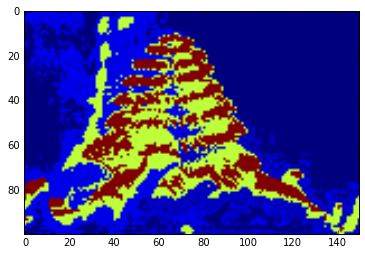

In [19]:
image_pixels = []
for i in range(len(data_set)):
    #RGB = pixil_color_map.get(str(val_set[i]))
    RGB = pixil_color_map.setdefault(str(data_set[i]), [0, 0, 0])
    image_pixels.append(RGB[0] * 256**2 + RGB[1]*256 + RGB[2])
    

print(len(pixil_color_map))
cluster_color_image = (np.array(image_pixels)).reshape((100, 150))
plt.imshow(cluster_color_image)